In [1]:
from math import *
from expressions import *
from abc import ABC, abstractmethod
import matplotlib.pyplot as plt
from draw2d import *

In [2]:
def f(x):
    return (3*x**2+x)*sin(x)

In [3]:
class Power():
    def __init__(self,base,exponent):
        self.base=base
        self.exponent=exponent

In [4]:
class Number():
    def __init__(self,number):
        self.number=number

In [5]:
class Variable():
    def __init__(self,symbol):
        self.symbol=symbol

In [6]:
Power(Variable("x"),Number(2))

In [7]:
class Product():
    def __init__(self,exp1,exp2):
        self.exp1=exp1
        self.exp2=exp2

In [8]:
Product(Number(3),Power(Variable("x"),Number(2)))

In [9]:
class Sum():
    def __init__(self,*exps):
        self.exps=exps

In [10]:
class Function():
    def __init__(self,name):
        self.name=name

In [11]:
class Apply():
    def __init__(self,function,argument):
        self.function=function
        self.argument=argument

In [12]:
f_expression=Product(
    Sum(
        Product(
            Number(3),
            Power(
                Variable("x"),
                Number(2))),
        Variable("x")),
    Apply(
        Function("sin"),
        Variable("x")))

In [13]:
Apply(Function("cos"),Sum(Power(Variable("x"),Number("3")),Number(-5)))

In [14]:
def f(y,z):
    return log(y**z)

In [15]:
Apply(Function('ln'),Power(Variable('y'),Variable('z')))

In [16]:
class Quotient():
    def __init__(self,numerator,denominator):
        self.numerator=numerator
        self.denominator=denominator

In [17]:
Quotient(Sum(Variable('a'),Variable('b')),Number(2))

In [18]:
class Difference():
    def __init__(self,exp1,exp2):
        self.exp1=exp1
        self.exp2=exp2

In [19]:
Difference(
    Power(Variable("b"),Number(2)),
    Product(Number(4),Product(Variable("a"),Variable("c")))
)

In [20]:
class Negative():
    def __init__(self,exp):
        self.exp=exp

In [21]:
Negative(Sum(Power(Variable('x'),Number(2)),Variable("y")))

In [22]:
A=Variable('a')
B=Variable('b')
C=Variable('c')
sqrt=Function('sqrt')

In [23]:
Quotient(
    Sum(
        Negative(B),
        Apply(
            sqrt,
            Difference(
                Power(B,Number(2)),
                Product(Number(4),Product(A,C))))),
        Product(Number(2),A))

In [24]:
def f(x):
    return (3*x**2+x)*sin(x)

In [25]:
def distinct_variables(exp):
    if isinstance(exp,Variable):
        return set(exp.symbol)
    elif isinstance(exp,Number):
        return set()
    elif isinstance(exp,Sum):
        return set().union(*[distinct_variables(exp) for exp in exp.exps])
    elif isinstance(exp,Product):
        return distinct_variables(exp.exp1).union(distinct_variables(exp.exp2))
    elif isinstance(exp,Power):
        return distinct_variables(exp.base).union(distinct_variables(exp.exponent))
    elif isinstance(exp,Apply):
        return distinct_variables(exp.argument)
    else:
        raise TypeError("Not a vaild expression")


In [26]:
distinct_variables(Variable('z'))

{'z'}

In [27]:
distinct_variables(Number(3))

set()

In [28]:
distinct_variables(f_expression)

{'x'}

In [29]:
class Expression(ABC):
    @abstractmethod
    def evaluate(self, **bindings):
        pass

In [30]:
class Number(Expression):
    def __init__(self,number):
        self.number=number
    def evaluate(self,**bindings):
        return self.number

In [31]:
Number(7).evaluate(x=3,y=6,q=-15)

7

In [32]:
class Variable(Expression):
    def __init__(self,symbol):
        self.symbol=symbol
    def evaluate(self,**bindings):
        try:
            return bindings[self.symbol]
        except:
            return KeyError("Variable '{}' is not bound.".format(self.symbol))

In [33]:
Variable("x").evaluate(x=5)

5

In [34]:
# # KeyError: "Variable 'x' is not bound." 
# Variable("x").evaluate(y=5)

In [35]:
class Product(Expression):
    def __init__(self, exp1, exp2):
        self.exp1=exp1
        self.exp2=exp2
    def evaluate(self, **bindings):
        return self.exp1.evaluate(**bindings)*self.exp2.evaluate(**bindings)

In [36]:
Product(Variable("x"),Variable("y")).evaluate(x=2,y=5)

10

In [37]:
_function_bindings={
    "sin":math.sin,
    "cos":math.cos,
    "ln":math.log
}
class Apply(Expression):
    def __init__(self,function,argument):
        self.function=function
        self.argument=argument
    def evaluate(self,**bindings):
        return _function_bindings[self.function.name](self.argument.evaluate(**bindings))

In [38]:
class Sum(Expression):
    def __init__(self, *exps):
        self.exps=exps
    def evaluate(self, **bindings):
        return sum([exp.evaluate(**bindings) for exp in self.exps])
    
class Power(Expression):
    def __init__(self,base,exponent):
        self.base=base
        self.exponent=exponent
    def evaluate(self, **bindings):
        return self.base.evaluate(**bindings)**self.exponent.evaluate(**bindings)
    
class Difference(Expression):
    def __init__(self,exp1,exp2):
        self.exp1=exp1
        self.exp2=exp2
    def evaluate(self, **bindings):
        return self.exp1.evaluate(**bindings)-self.exp2.evaluate(**bindings)
    
class Quotient(Expression):
    def __init__(self,numerator,denominator):
        self.numerator=numerator
        self.denominator=denominator
    def evaluate(self, **bindings):
        return self.numerator.evaluate(**bindings)/self.denominator.evaluate(**bindings)

In [39]:
f_expression=Product(
    Sum(
        Product(
            Number(3),
            Power(
                Variable("x"),
                Number(2))),
        Variable("x")),
    Apply(
        Function("sin"),
        Variable("x")))
f_expression.evaluate(x=5)

-76.71394197305108

In [40]:
f(5)

-76.71394197305108

In [41]:
class Expression(ABC):
    @abstractmethod
    def evaluate(self, **bindings):
        pass
    def expand(self):
        pass

In [42]:
class Number(Expression):
    def __init__(self,number):
        self.number=number
    def evaluate(self,**bindings):
        return self.number
    def expand(self):
        return self

In [43]:
class Sum(Expression):
    def __init__(self, *exps):
        self.exps = exps
    def evaluate(self, **bindings):
        return sum([exp.evaluate(**bindings) for exp in self.exps])
    def expand(self):
        return Sum(*[exp.expand() for exp in exp.exps])

In [44]:
_function_bindings={
    "sin":math.sin,
    "cos":math.cos,
    "ln":math.log
}
class Apply(Expression):
    def __init__(self,function,argument):
        self.function=function
        self.argument=argument
    def evaluate(self,**bindings):
        return _function_bindings[self.function.name](self.argument.evaluate(**bindings))
    def expand(self):
        return Apply(self.function,self.argument.expand())

In [45]:
class Product(Expression):
    def __init__(self, exp1, exp2):
        self.exp1 = exp1
        self.exp2 = exp2
    def evaluate(self, **bindings):
        return self.exp1.evaluate(**bindings) * self.exp2.evaluate(**bindings)
    def expand(self):
        expanded1=self.exp1.expand()
        expanded2=self.exp2.expand()
        if isinstance(expanded1,Sum):
            return Sum(*[Product(e,expanded2).expand() for e in expanded1.exps])
        elif isinstance(expanded2,Sum):
            return Sum(*[Product(expanded1,e).expand() for e in expanded2.exps])
        else:
            return Product(expanded1,expanded2)

In [46]:
def contains(exp,var):
    if isinstance(exp,Variable):
        return exp.symbol==var.symbol
    elif isinstance(exp,Number):
        return False
    elif isinstance(exp,Sum):
        return any([contains(e,var) for e in exp.exps])
    elif isinstance(exp,Product):
        return contains(exp.exp1,var) or contains(exp.exp2,var)
    elif isinstance(exp,Power):
        return contains(exp.exp1,var) or contains(exp.exponent,var)
    elif isinstance(exp,Apply):
        return contains(exp.argument,var)
    else:
        raise TypeError("Not a vaild expression")

In [47]:
def distinct_function(exp):
    if isinstance(exp,Variable):
        return set()
    elif isinstance(exp,Number):
        return set()
    elif isinstance(exp,Sum):
        return set().union(*[distinct_function(exp) for exp in exp.exps])
    elif isinstance(exp,Product):
        return distinct_function(exp.exp1).union(distinct_function(exp.exp2))
    elif isinstance(exp,Power):
        return distinct_function(exp.base).union(distinct_function(exp.exponent))
    elif isinstance(exp,Apply):
        return set([exp.function.name]).union(distinct_function(exp.argument))
    else:
        raise TypeError("Not a vaild expression")

In [48]:
def contains_sum(exp):
    if isinstance(exp,Variable):
        return False
    elif isinstance(exp,Number):
        return False
    elif isinstance(exp,Sum):
        return True
    elif isinstance(exp,Product):
        return contains_sum(exp.exp1) or (contains_sum(exp.exp2))
    elif isinstance(exp,Power):
        return contains_sum(exp.base) or (contains_sum(exp.exponent))
    elif isinstance(exp,Apply):
        return contains_sum(exp.argument)
    else:
        raise TypeError("Not a vaild expression")

In [49]:
class Expression(ABC):
    @abstractmethod
    def evaluate(self, **bindings):
        pass
    @abstractmethod
    def expand(self):
        pass
    
    # Printing expressions legibly in REPL (See first mini project in 2.4)
    @abstractmethod
    def display(self):
        pass
    def __repr__(self):
        return self.display()

In [50]:
"RGB:{}".format(",".join(['r','g','b']))

'RGB:r,g,b'

In [51]:
class Sum(Expression):
    def __init__(self, *exps):
        self.exps=exps
    def evaluate(self, **bindings):
        return sum([exp.evaluate(**bindings) for exp in self.exps])
    def expand(self):
        return Sum(*[exp.expand() for exp in self.exps])
    def display(self):
        return "Sum({})".format(",".join([e.display() for e in self.exps]))
    
class Product(Expression):
    def __init__(self, exp1, exp2):
        self.exp1=exp1
        self.exp2=exp2
    def evaluate(self, **bindings):
        return self.exp1.evaluate(**bindings) * self.exp2.evaluate(**bindings)
    def expand(self):
        expanded1=self.exp1.expand()
        expanded2=self.exp2.expand()
        if isinstance(expanded1, Sum):
            return Sum(*[Product(e,expanded2).expand() for e in expanded1.exps])
        elif isinstance(expanded2, Sum):
            return Sum(*[Product(expanded1,e) for e in expanded2.exps])
        else:
            return Product(expanded1,expanded2)
    def display(self):
        return "Product({},{})".format(self.exp1.display(),self.exp2.display())
        
class Difference(Expression):
    def __init__(self,exp1,exp2):
        self.exp1=exp1
        self.exp2=exp2
    def evaluate(self, **bindings):
        return self.exp1.evaluate(**bindings) - self.exp2.evaluate(**bindings)
    def expand(self):
        return self
    def display(self):
        return "Difference({},{})".format(self.exp1.display(), self.exp2.display())
    
class Quotient(Expression):
    def __init__(self,numerator,denominator):
        self.numerator=numerator
        self.denominator=denominator
    def evaluate(self, **bindings):
        return self.numerator.evaluate(**bindings) / self.denominator.evaluate(**bindings)
    def expand(self):
        return self
    def display(self):
        return "Quotient({},{})".format(self.numerator.display(),self.denominator.display())
    
class Negative(Expression):
    def __init__(self,exp):
        self.exp=exp
    def evaluate(self, **bindings):
        return - self.exp.evaluate(**bindings)
    def expand(self):
        return self
    def display(self):
        return "Negative({})".format(self.exp.display())
    
class Number(Expression):
    def __init__(self,number):
        self.number=number
    def evaluate(self, **bindings):
        return self.number
    def expand(self):
        return self
    def display(self):
        return "Number({})".format(self.number)
    
class Power(Expression):
    def __init__(self,base,exponent):
        self.base=base
        self.exponent=exponent
    def evaluate(self, **bindings):
        return self.base.evaluate(**bindings) ** self.exponent.evaluate(**bindings)
    def expand(self):
        return self
    def display(self):
        return "Power({},{})".format(self.base.display(),self.exponent.display())
    
class Variable(Expression):
    def __init__(self,symbol):
        self.symbol=symbol
    def evaluate(self, **bindings):
        return bindings[self.symbol]
    def expand(self):
        return self
    def display(self):
        return "Variable(\"{}\")".format(self.symbol)
    
class Function():
    def __init__(self,name,make_latex=None):
        self.name=name
        self.make_latex=make_latex
    def latex(self,arg_latex):
        if self.make_latex:
            return self.make_latex(arg_latex)
        else:
            return " \\operatorname{{ {} }} \\left( {} \\right)".format(self.name, arg_latex)
  
class Apply(Expression):
    def __init__(self,function,argument):
        self.function=function
        self.argument=argument
    def evaluate(self, **bindings):
        return _function_bindings[self.function.name](self.argument.evaluate(**bindings))
    def expand(self):
        return Apply(self.function, self.argument.expand())
    def display(self):
        return "Apply(Function(\"{}\"),{})".format(self.function.name, self.argument.display())

In [52]:
Apply(Function('sin'),Variable('x')).evaluate(x=2)

0.9092974268256817

In [53]:
# Apply(Function('tan'),Variable('x')).evaluate(x=2)

In [54]:
Y = Variable('y')
Z = Variable('z')
A = Variable('a')
B = Variable('b')
Product(Sum(A,B),Sum(Y,Z))

Product(Sum(Variable("a"),Variable("b")),Sum(Variable("y"),Variable("z")))

In [55]:
Product(Sum(A,B),Sum(Y,Z)).expand()

Sum(Sum(Product(Variable("a"),Variable("y")),Product(Variable("a"),Variable("z"))),Sum(Product(Variable("b"),Variable("y")),Product(Variable("b"),Variable("z"))))

In [56]:
f_expression=Product(
    Sum(
        Product(
            Number(3),
            Power(
                Variable("x"),
                Number(2))),
        Variable("x")),
    Apply(
        Function("sin"),
        Variable("x")))
f_expression.expand()

Sum(Product(Product(Number(3),Power(Variable("x"),Number(2))),Apply(Function("sin"),Variable("x"))),Product(Variable("x"),Apply(Function("sin"),Variable("x"))))

In [57]:
from expressions import *
Product(Power(Variable("x"),Number(2)),Apply(Function("sin"),Variable("y")))

Product(Power(Variable("x"),Number(2)),Apply(Function("sin"),Variable("y")))

In [58]:
Power(Variable("x"),Number(2))._python_expr()

'(x) ** (2)'

In [59]:
Power(Variable("x"),Number(2)).python_function(x=3)

9

In [60]:
def plot_function(f,tmin,tmax,tlabel=None,xlabel=None,axes=False, **kwargs):
    ts = np.linspace(tmin,tmax,1000)
    if tlabel:
        plt.xlabel(tlabel,fontsize=18)
    if xlabel:
        plt.ylabel(xlabel,fontsize=18)
    plt.plot(ts, [f(t) for t in ts], **kwargs)
    if axes:
        total_t = tmax-tmin
        plt.plot([tmin-total_t/10,tmax+total_t/10],[0,0],c='k',linewidth=1)
        plt.xlim(tmin-total_t/10,tmax+total_t/10)
        xmin, xmax = plt.ylim()
        plt.plot([0,0],[xmin,xmax],c='k',linewidth=1)
        plt.ylim(xmin,xmax)

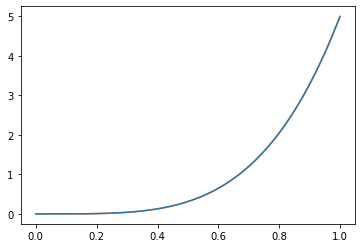

In [61]:
def p(x):
    return x**5
plot_function(lambda x:5*x**4,0,1,color='C1')


def average_flow_rate(v,t1,t2):
    return (v(t2)-v(t1))/(t2-t1)

def interval_flow_rates(v,t1,t2,dt):
    return [(t,average_flow_rate(v,t,t+dt)) for t in np.arange(t1,t2,dt)]

def plot_interval_flow_rates(volume,t1,t2,dt):
    series=interval_flow_rates(volume,t1,t2,dt)
    times=[t for (t,_) in series]
    rates=[q for (_,q) in series]
    plt.plot(times,rates)
    
plot_interval_flow_rates(p,0,1,0.001)

In [62]:
class Expression(ABC):
    @abstractmethod
    def evaluate(self, **bindings):
        pass
    @abstractmethod
    def expand(self):
        pass
    
    # Printing expressions legibly in REPL (See first mini project in 2.4)
    @abstractmethod
    def display(self):
        pass
    def __repr__(self):
        return self.display()
    
    @abstractmethod
    def derivatetive(self,var):
        pass

In [63]:
class Number(Expression):
    def __init__(self,number):
        self.number=number
    def evaluate(self, **bindings):
        return self.number
    def expand(self):
        return self
    def display(self):
        return "Number({})".format(self.number)
    def derivatetive(self,var):
        return Number(0)

In [64]:
class Variable(Expression):
    def __init__(self,symbol):
        self.symbol=symbol
    def evaluate(self, **bindings):
        return bindings[self.symbol]
    def expand(self):
        return self
    def display(self):
        return "Variable(\"{}\")".format(self.symbol)
    def derivatetive(self,var):
        if self.symbol==var.symbol:
            return Number(1)
        else:
            return Number(0)

In [65]:
class Sum(Expression):
    def __init__(self, *exps):
        self.exps=exps
    def evaluate(self, **bindings):
        return sum([exp.evaluate(**bindings) for exp in self.exps])
    def expand(self):
        return Sum(*[exp.expand() for exp in self.exps])
    def display(self):
        return "Sum({})".format(",".join([e.display() for e in self.exps]))
    def derivatetive(self,var):
        return Sum(*[exp.derivatetive(var) for exp in self.exps])

In [66]:
Sum(Variable("x"),Variable("c"),Number(1)).derivatetive(Variable("x"))

Sum(Number(1),Number(0),Number(0))

In [67]:
class Product(Expression):
    def __init__(self, exp1, exp2):
        self.exp1=exp1
        self.exp2=exp2
    def evaluate(self, **bindings):
        return self.exp1.evaluate(**bindings) * self.exp2.evaluate(**bindings)
    def expand(self):
        expanded1=self.exp1.expand()
        expanded2=self.exp2.expand()
        if isinstance(expanded1, Sum):
            return Sum(*[Product(e,expanded2).expand() for e in expanded1.exps])
        elif isinstance(expanded2, Sum):
            return Sum(*[Product(expanded1,e) for e in expanded2.exps])
        else:
            return Product(expanded1,expanded2)
    def display(self):
        return "Product({},{})".format(self.exp1.display(),self.exp2.display())
    def derivatetive(self,var):
        return Sum(Product(self.exp1.derivatetive(var),self.exp2),Product(self.exp1,self.exp2.derivatetive(var)))

In [68]:
Product(Variable("c"),Variable("x")).derivatetive(Variable("x"))

Sum(Product(Number(0),Variable("x")),Product(Variable("c"),Number(1)))

In [69]:
_function_bindings={
    "sin":math.sin,
    "cos":math.cos,
    "ln":math.log,
    "sqrt":math.sqrt
}

_var=Variable('placeholder variable')

_derivatives={
    "sin":Apply(Function("cos"),_var),
    "cos":Product(Number(-1),Apply(Function("sin"),_var)),
    "ln":Quotient(Number(1),_var),
    "sqrt":Quotient(Number(1),Product(Number(2),Apply(Function("sqrt"),_var)))
}

class Apply(Expression):
    def __init__(self,function,argument):
        self.function=function
        self.argument=argument
    def evaluate(self, **bindings):
        return _function_bindings[self.function.name](self.argument.evaluate(**bindings))
    def expand(self):
        return Apply(self.function, self.argument.expand())
    def display(self):
        return "Apply(Function(\"{}\"),{})".format(self.function.name, self.argument.display())
    def derivatetive(self,var):
        return Product(
                                self.argument.derivatetive(var),
                                _derivatives[self.function.name].substitute(_var,self.argument))

In [70]:
class Power(Expression):
    def __init__(self,base,exponent):
        self.base=base
        self.exponent=exponent
    def evaluate(self, **bindings):
        return self.base.evaluate(**bindings) ** self.exponent.evaluate(**bindings)
    def expand(self):
        return self
    def display(self):
        return "Power({},{})".format(self.base.display(),self.exponent.display())
    def derivative(self,var):
        if isinstance(self.exponent,Number):
            power_rule=Product(
                Number(self.exponent.number),
                Power(self.base,Number(self.exponent.number-1)))
            return Product(self.base.derivative(var),power_rule)
        elif isinstance(self.base,Number):
            exponential_rule=Product(
                Apply(Function("ln"),
                Number(self.base.number)),
                self
            )
            return Product(self.exponent.derivative(var),exponential_rule)
        else:
            raise Exception(
            "can't take derivate of power {}".format(
            self.display()))

In [71]:
from expressions import *
Apply(Function("sin"),Power(Variable("x"),Number(2))).derivative(Variable("x"))

Product(Product(Number(1),Product(Number(2),Power(Variable("x"),Number(1)))),Apply(Function("cos"),Power(Variable("x"),Number(2))))

In [73]:
Apply(Function("sin"),Power(Variable("x"),Number(2))).derivative(x)

Product(Product(Number(1),Product(Number(2),Power(Variable("x"),Number(1)))),Apply(Function("cos"),Power(Variable("x"),Number(2))))

In [72]:
class Product(Expression):
    def __init__(self, exp1, exp2):
        self.exp1=exp1
        self.exp2=exp2
    def evaluate(self, **bindings):
        return self.exp1.evaluate(**bindings) * self.exp2.evaluate(**bindings)
    def expand(self):
        expanded1=self.exp1.expand()
        expanded2=self.exp2.expand()
        if isinstance(expanded1, Sum):
            return Sum(*[Product(e,expanded2).expand() for e in expanded1.exps])
        elif isinstance(expanded2, Sum):
            return Sum(*[Product(expanded1,e) for e in expanded2.exps])
        else:
            return Product(expanded1,expanded2)
    def display(self):
        return "Product({},{})".format(self.exp1.display(),self.exp2.display())
    def derivatetive(self,var):
        if not contains(self.exp1,var):
            return Product(self.exp1,self.exp2.derivatetive(var))
        elif not contains(self.exp2,var):
            return Product(self.exp1.derivatetive(var),self.exp2)
        else:
            return Sum(Product(self.exp1.derivatetive(var),self.exp2),Product(self.exp1,self.exp2.derivatetive(var)))

In [75]:
from sympy import *
from sympy.core.core import *

In [76]:
Mul(Symbol('y'),Add(3,Symbol('x')))

y*(x + 3)

In [77]:
y=Symbol('y')
x=Symbol('x')
y*(3+x)

y*(x + 3)

In [93]:
y*(3+x).subs(x,1)

4*y

In [94]:
(x**2).diff(x)

2*x

In [91]:
(3*x**2).integrate(x)

x**3

In [95]:
Integer(0).integrate(x)

0

In [97]:
(x*cos(x)).integrate(x)

x*sin(x) + cos(x)

In [98]:
(x**2).integrate(x)

x**3/3